In [31]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.datasets import mnist

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

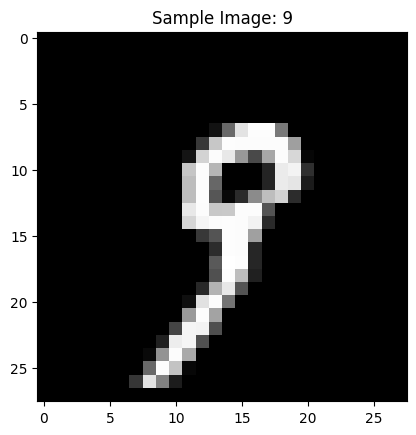

In [33]:
sample_index = 19
plt.imshow(x_train[sample_index], cmap='gray')
plt.title('Sample Image: {}'.format(y_train[sample_index]))
plt.show()

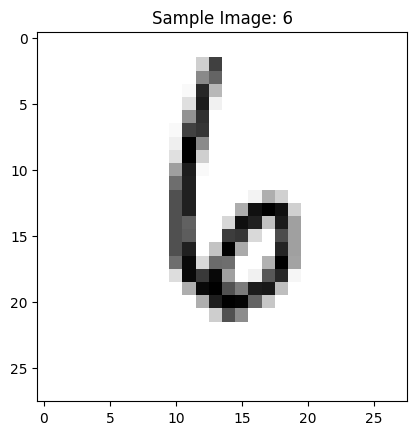

In [34]:
sample_index_1 = 10540
plt.imshow(x_train[sample_index_1], cmap='gray_r')
plt.title('Sample Image: {}'.format(y_train[sample_index_1]))
plt.show()

In [35]:
num_images = 10
num_row = 2
num_col = 5

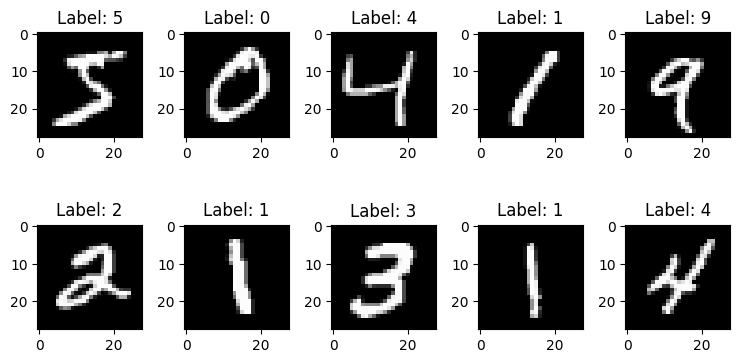

In [36]:
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_images):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [37]:
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [42]:
inputs = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
dropout1 = Dropout(0.25)(pool2)
flatten1 = Flatten()(dropout1)
dense1 = Dense(256, activation='relu')(flatten1)
dropout2 = Dropout(0.5)(dense1)
outputs = Dense(10, activation='softmax')(dropout2)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train, epochs=12, batch_size=500, validation_data=(x_test, y_test))


Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.7492 - loss: 0.7746 - val_accuracy: 0.9826 - val_loss: 0.0562
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.9738 - loss: 0.0876 - val_accuracy: 0.9882 - val_loss: 0.0362
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9896 - val_loss: 0.0289
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.9862 - loss: 0.0483 - val_accuracy: 0.9908 - val_loss: 0.0272
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.9881 - loss: 0.0399 - val_accuracy: 0.9926 - val_loss: 0.0205
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9923 - val_loss: 0.0234
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9939 - val_loss: 0.0191
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 198ms/step - accuracy: 0.9924 - loss: 0

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.017935216426849365
Test accuracy: 0.9943000078201294


In [50]:
from keras.models import load_model

In [51]:
# Save the model in native Keras format
model.save('Pridic_hand_writing_via_CNN_MNIST.keras')

In [48]:
# Save the model
model.save('Pridic_hand_writing_via_CNN_MNIST.h5')

In [52]:
# Load your Keras model
model = load_model('Pridic_hand_writing_via_CNN_MNIST.h5')

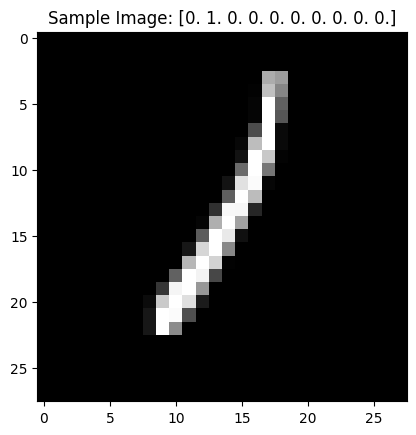

In [57]:
sample_index = 56123
plt.imshow(x_train[sample_index], cmap='gray')
plt.title('Sample Image: {}'.format(y_train[sample_index]))
plt.show()